<a href="https://colab.research.google.com/github/dinosukqwerty/Final-Project---Beta-Tech/blob/master/mini_project_hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!gdown --id 1yRP3qUi1eQQeC_K1trsi21jXaHrqCCnX 
df = pd.read_csv('hotel_bookings_data.csv')

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yRP3qUi1eQQeC_K1trsi21jXaHrqCCnX
To: /content/hotel_bookings_data.csv
100% 17.1M/17.1M [00:00<00:00, 63.7MB/s]


In [ ]:
df.reset_index()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,Resort Hotel,0,342,2017,September,27,1,0,0,...,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,1,Resort Hotel,0,737,2017,September,27,1,0,0,...,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,2,Resort Hotel,0,7,2017,September,27,1,0,1,...,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,3,Resort Hotel,0,13,2017,September,27,1,0,1,...,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,4,Resort Hotel,0,14,2017,September,27,1,0,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2019,October,35,30,2,5,...,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,119386,City Hotel,0,102,2019,October,35,31,2,5,...,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,119387,City Hotel,0,34,2019,October,35,31,2,5,...,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,119388,City Hotel,0,109,2019,October,35,31,2,5,...,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


#**Preprocessing**

## Cek **Typedata**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
cat = df.select_dtypes(include='object')
catCol = cat.columns
print(f'Ada {len(catCol)} kolom categorical, yaitu:\n{catCol}')

Ada 9 kolom categorical, yaitu:
Index(['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status'],
      dtype='object')


In [ ]:
num = df.select_dtypes(include=['int64', 'float64'])
numCol = num.columns
print(f'Ada {len(numCol)} kolom numerical, yaitu:\n{numCol}')

Ada 20 kolom numerical, yaitu:
Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults',
       'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


## Cek **Null Values**

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

### Handling missing **values**

In [ ]:
df['city'].describe()

count            118902
unique              177
top       Kota Denpasar
freq              48590
Name: city, dtype: object

In [ ]:
df['city'].value_counts()

Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

In [ ]:
citym = df['city'].mode()[0]
df['city'] = df['city'].fillna(citym)
df['city'].isna().sum()

0

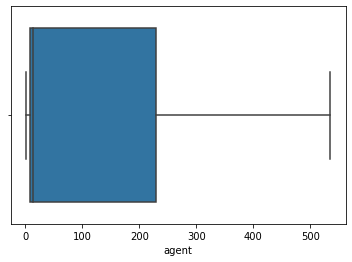

In [ ]:
sns.boxplot(x=df['agent'])


In [ ]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
agentm = df['agent'].median()
df['agent'] = df['agent'].fillna(agentm)
df['agent'].isna().sum()

0

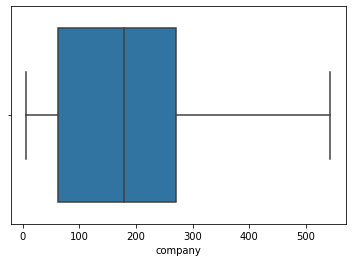

In [ ]:
sns.boxplot(x=df['company'])

In [ ]:
companym = df['company'].median()
df['company'] = df['company'].fillna(companym)
df['company'].isna().sum() 

0

## **Encoding Meal**

In [ ]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [ ]:
#Encoding meal
df.meal = df.meal.map({
    'Undefined':0,
    'No Meal':1,
    'Breakfast':2,
    'Dinner':3,
    'Full Board': 4
})

In [ ]:
df.arrival_date_month.unique()

array(['September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August'],
      dtype=object)

## **Drop previous_bookings_not_canceled**

In [ ]:
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [ ]:
df['previous_bookings_not_canceled'].value_counts()

0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [ ]:
df = df.drop(['previous_bookings_not_canceled'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   lead_time                    119390 non-null  int64  
 3   arrival_date_year            119390 non-null  int64  
 4   arrival_date_month           119390 non-null  object 
 5   arrival_date_week_number     119390 non-null  int64  
 6   arrival_date_day_of_month    119390 non-null  int64  
 7   stays_in_weekend_nights      119390 non-null  int64  
 8   stays_in_weekdays_nights     119390 non-null  int64  
 9   adults                       119390 non-null  int64  
 10  children                     119386 non-null  float64
 11  babies                       119390 non-null  int64  
 12  meal                         119390 non-null  int64  
 13 

In [ ]:
#change month to 4 season

df['arrival_date_month'] = df['arrival_date_month'].replace(['December', 'January', 'February'], 'Winter')
df['arrival_date_month'] = df['arrival_date_month'].replace(['March', 'April', 'May'], 'Spring')
df['arrival_date_month'] = df['arrival_date_month'].replace(['June', 'July', 'August'], 'Summer')
df['arrival_date_month'] = df['arrival_date_month'].replace(['September', 'October', 'November'], 'Antumn')
df.arrival_date_month.unique()

array(['Antumn', 'Winter', 'Spring', 'Summer'], dtype=object)

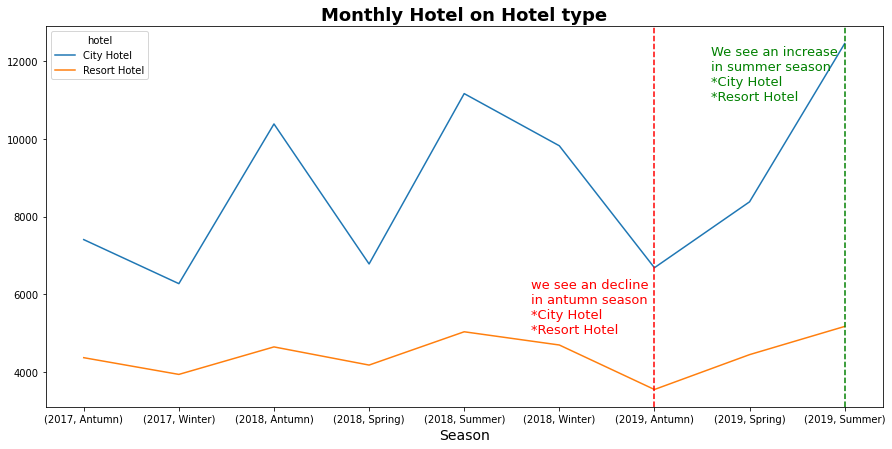

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

# use unstack()
dff = df.groupby(["arrival_date_year", "arrival_date_month", "hotel"])["hotel"].count().unstack().plot(ax=ax)
plt.axvline(x = 8, color = 'g', linestyle='--', label = 'axvline - full height')
plt.axvline(x = 6, color = 'r', linestyle='--', label = 'axvline - full height')

plt.title('Monthly Hotel on Hotel type', fontsize=18, fontweight='bold')
plt.xlabel('Season', fontsize=14)

plt.text(6.59, 11000, s='We see an increase \nin summer season\n*City Hotel\n*Resort Hotel', color="green", 
       fontsize=13);
plt.text(4.7, 5000, s='we see an decline \nin antumn season\n*City Hotel\n*Resort Hotel', color="red",
       fontsize=13);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   lead_time                    119390 non-null  int64  
 3   arrival_date_year            119390 non-null  int64  
 4   arrival_date_month           119390 non-null  object 
 5   arrival_date_week_number     119390 non-null  int64  
 6   arrival_date_day_of_month    119390 non-null  int64  
 7   stays_in_weekend_nights      119390 non-null  int64  
 8   stays_in_weekdays_nights     119390 non-null  int64  
 9   adults                       119390 non-null  int64  
 10  children                     119386 non-null  float64
 11  babies                       119390 non-null  int64  
 12  meal                         119390 non-null  int64  
 13 

In [ ]:
df['duration'] = df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights']

In [ ]:
df_dur = df.groupby(["duration", "hotel"])["hotel"].count()
df_dur

duration  hotel       
0         City Hotel        331
          Resort Hotel      384
1         City Hotel      13272
          Resort Hotel     7748
2         City Hotel      21426
                          ...  
49        City Hotel          1
56        Resort Hotel        2
57        City Hotel          1
60        Resort Hotel        1
69        Resort Hotel        1
Name: hotel, Length: 76, dtype: int64

In [ ]:
df_1 = df.groupby(["duration", "hotel"]).agg({"is_canceled": "mean"})
df_1

is_canceled
duration hotel                    
0        City Hotel       0.069486
         Resort Hotel     0.031250
1        City Hotel       0.309147
         Resort Hotel     0.150749
2        City Hotel       0.486978
...                            ...
49       City Hotel       0.000000
56       Resort Hotel     0.500000
57       City Hotel       0.000000
60       Resort Hotel     0.000000
69       Resort Hotel     0.000000

[76 rows x 1 columns]

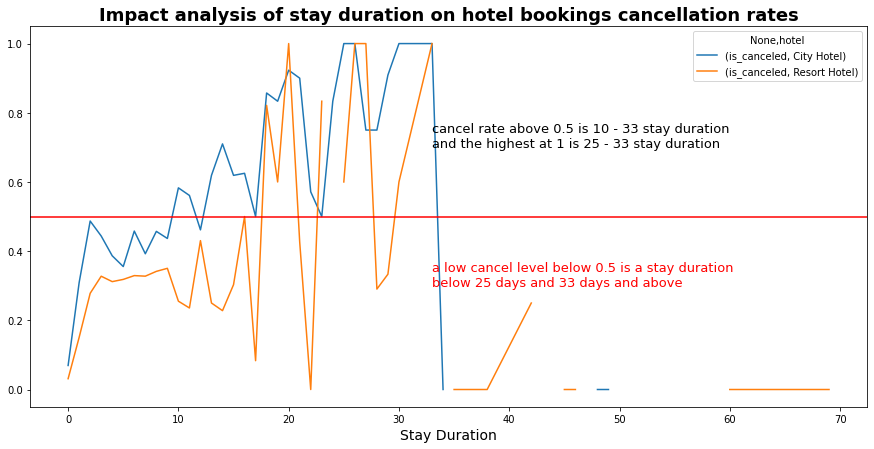

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

# use unstack()
df_1 = df.groupby(["duration", "hotel"]).agg({"is_canceled": "mean"}).unstack().plot(ax=ax)

plt.axhline(y = 0.5, color = 'r', linestyle = '-', label = 'axvline - full height')


plt.title('Impact analysis of stay duration on hotel bookings cancellation rates', fontsize=18, fontweight='bold')
plt.xlabel('Stay Duration', fontsize=14)

plt.text(33,0.7, s='cancel rate above 0.5 is 10 - 33 stay duration \nand the highest at 1 is 25 - 33 stay duration', color="black", 
       fontsize=13);
plt.text(33,0.3, s='a low cancel level below 0.5 is a stay duration \nbelow 25 days and 33 days and above', color="red",
       fontsize=13);

       

In [ ]:
df.lead_time.unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [ ]:
time_group = []
for x in df['lead_time']:
    if x <=30 :
        time_group.append('1 month')
    elif x <=60 :
        time_group.append('2 months')
    elif x <=90 :
        time_group.append('3 months')
    else:
        time_group.append('more than 3 months')

df['time_group'] = time_group

In [ ]:
time_group = ['1 month', '2 months', '3 months', 'more than 3 months']


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,duration,time_group
0,Resort Hotel,0,342,2017,Antumn,27,1,0,0,2,...,14.0,179.0,0,Personal,0.0,0,0,Check-Out,0,more than 3 months
1,Resort Hotel,0,737,2017,Antumn,27,1,0,0,2,...,14.0,179.0,0,Personal,0.0,0,0,Check-Out,0,more than 3 months
2,Resort Hotel,0,7,2017,Antumn,27,1,0,1,1,...,14.0,179.0,0,Personal,75.0,0,0,Check-Out,1,1 month
3,Resort Hotel,0,13,2017,Antumn,27,1,0,1,1,...,304.0,179.0,0,Personal,75.0,0,0,Check-Out,1,1 month
4,Resort Hotel,0,14,2017,Antumn,27,1,0,2,2,...,240.0,179.0,0,Personal,98.0,0,1,Check-Out,2,1 month


In [ ]:
df_cancel = df['is_canceled'].isin([1]).sum()
df_time_group = df.groupby(["time_group", "hotel"]).agg({"is_canceled": "mean"})
df_time_group

is_canceled
time_group         hotel                    
1 month            City Hotel       0.222541
                   Resort Hotel     0.129432
2 months           City Hotel       0.387585
                   Resort Hotel     0.308207
3 months           City Hotel       0.414459
                   Resort Hotel     0.346939
more than 3 months City Hotel       0.557363
                   Resort Hotel     0.394424

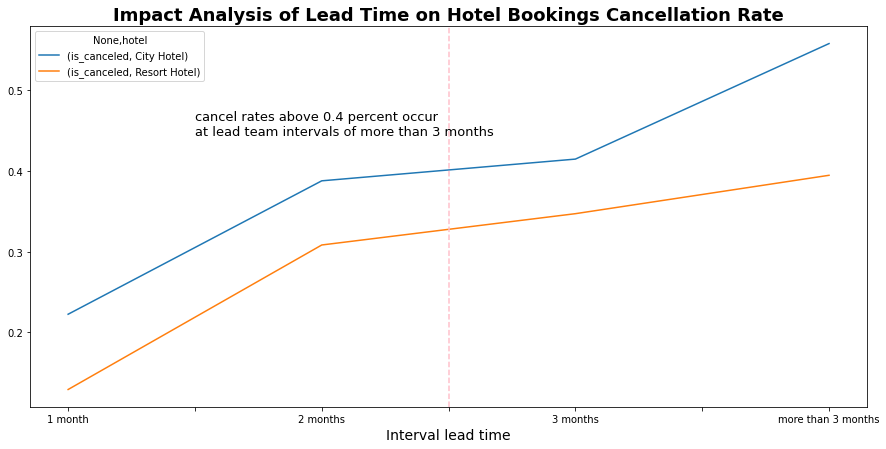

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

# use unstack()
df_time_group = df.groupby(["time_group", "hotel"]).agg({"is_canceled": "mean"}).unstack().plot(ax=ax)

plt.axvline(x = 1.5, color = 'pink', linestyle='--', label = 'axvline - full height')

plt.title('Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate', fontsize=18, fontweight='bold')
plt.xlabel('Interval lead time', fontsize=14)

plt.text(0.5,0.444, s='cancel rates above 0.4 percent occur \nat lead team intervals of more than 3 months', color="black", 
       fontsize=13);
       